In [41]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

import scipy.cluster.hierarchy as sch

# 1. Defining the functions and carrying out kmeans algorthm/analysis on age & spend score columns

In [47]:
#This showed 2 clusters on the dendogram but 3 clusters using Kmeans algorthm with a K value of 3

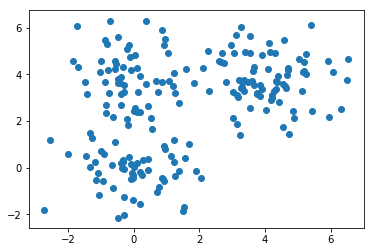

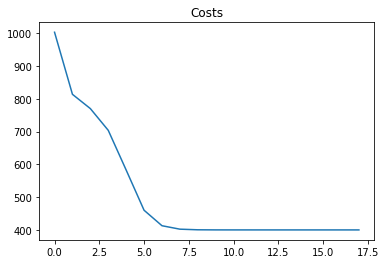

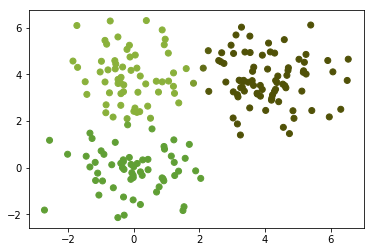

Final cost 399.36086963004345


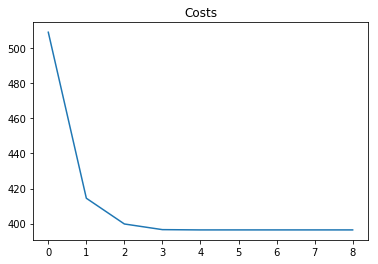

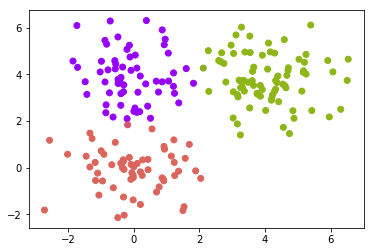

Final cost 396.3724077452139


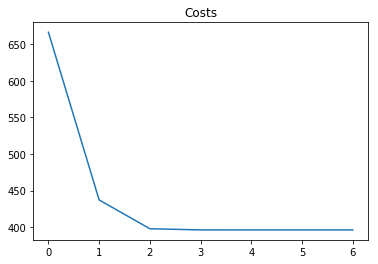

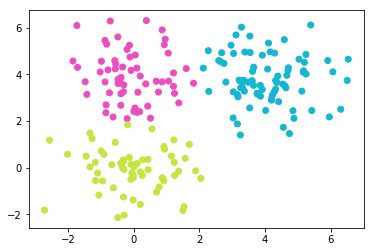

Final cost 396.17034664772086


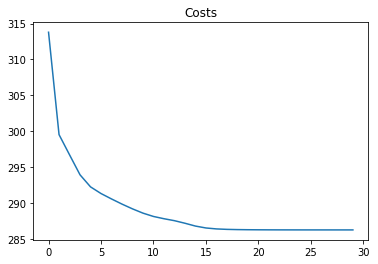

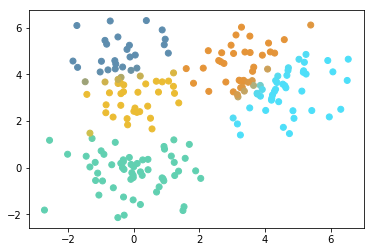

Final cost 286.2462203803391


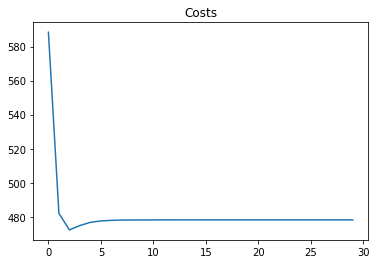

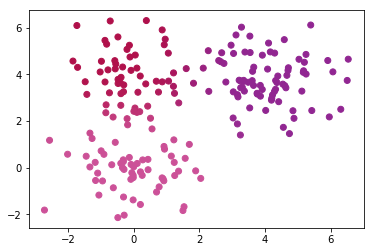

Final cost 478.1336010202415


In [38]:

def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R


def read_and_process_raw_data():
    data = pd.read_csv('Mall_Customers.csv')
    # After importing, I did "data.info, data.decsribe, data.isnull().any()" to get basic information about the csv file before proceeding  
    x = data.iloc[:,[2,4]].values
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = len(x) # number of samples
    X = np.zeros((N, D))
    X[:60, :] = np.random.randn(60, D) + mu1
    X[60:140, :] = np.random.randn(80, D) + mu2
    X[140:, :] = np.random.randn(60, D) + mu3
    return X


def main():
    X = read_and_process_raw_data()

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=1.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=3.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=10.0, show_plots=True)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)


if __name__ == '__main__':
    main()


# Alternate solution to No. 1

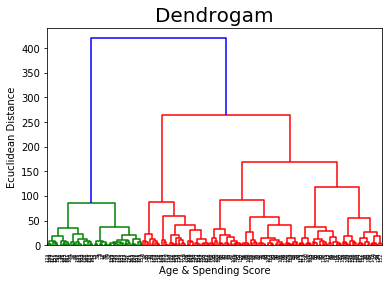

In [43]:
data = pd.read_csv('Mall_Customers.csv')
    # After importing, I did "data.info, data.decsribe, data.isnull().any()" to get basic information about the csv file before proceeding  
x = data.iloc[:,[2,4]].values
    


    
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Age & Spending Score')
plt.ylabel('Ecuclidean Distance')
plt.show()

# 2. Defining the functions and carrying out kmeans algorthm/analysis on income & spend score columns

In [48]:
##This showed 3 clusters on the dendogram and also 3 clusters using Kmeans algorthm with a K value of 3

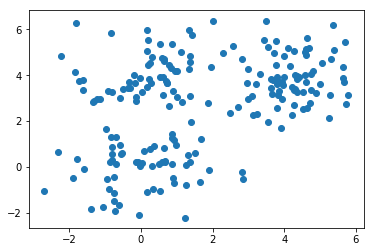

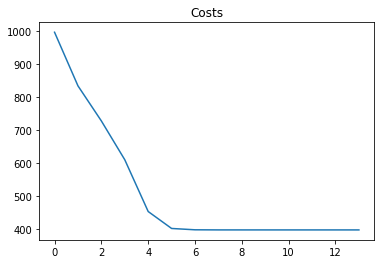

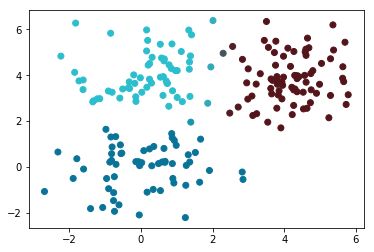

Final cost 397.4067242868134


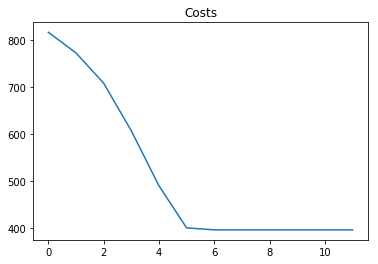

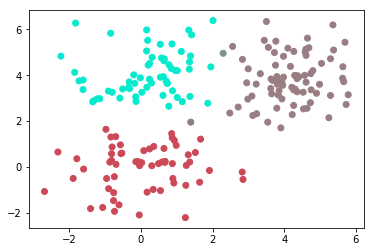

Final cost 395.73920327196305


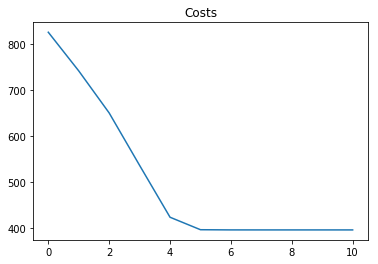

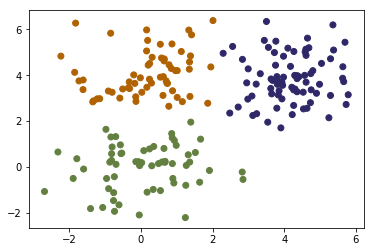

Final cost 395.54088629986313


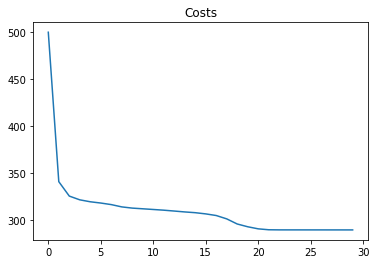

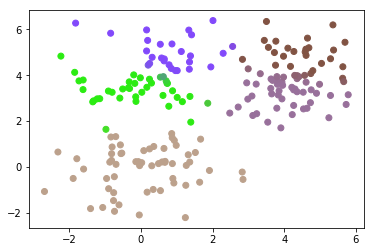

Final cost 289.5987913483102


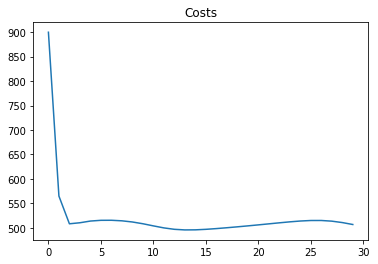

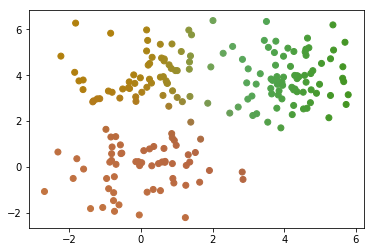

Final cost 506.5704286455335


In [39]:



def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R


def get_simple_data():
    data = pd.read_csv('Mall_Customers.csv')
    x = data.iloc[:,[3,4]].values
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = len(x) # number of samples
    X = np.zeros((N, D))
    X[:60, :] = np.random.randn(60, D) + mu1
    X[60:140, :] = np.random.randn(80, D) + mu2
    X[140:, :] = np.random.randn(60, D) + mu3
    return X


def main():
    X = get_simple_data()

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=1.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=3.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=10.0, show_plots=True)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)


if __name__ == '__main__':
    main()


# Alternate solution for No.2

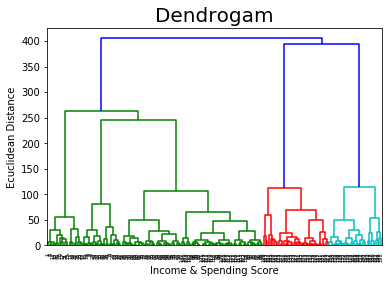

In [44]:
data = pd.read_csv('Mall_Customers.csv')
    # After importing, I did "data.info, data.decsribe, data.isnull().any()" to get basic information about the csv file before proceeding  
x = data.iloc[:,[3,4]].values
    


    
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Income & Spending Score')
plt.ylabel('Ecuclidean Distance')
plt.show()

# 3. Defining the functions and carrying out kmeans algorthm/analysis on age, income, & spend score columns

In [49]:
##This showed 3 clusters on the dendogram and also 3 clusters using Kmeans algorthm with a K value of 3

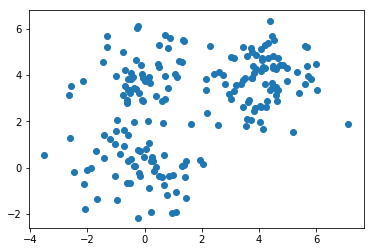

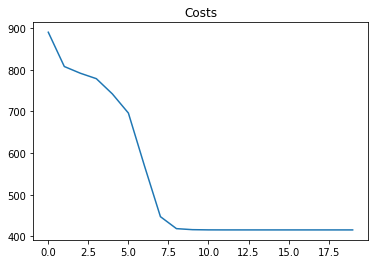

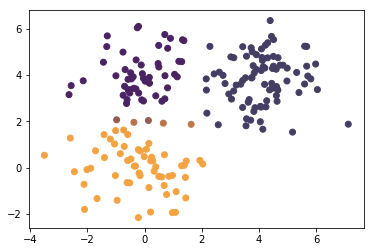

Final cost 415.46778507827474


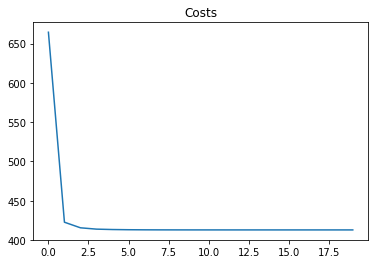

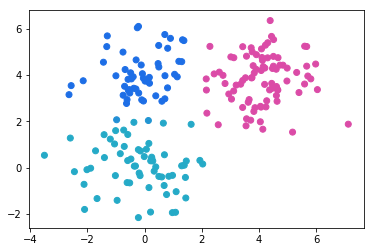

Final cost 412.78896089931214


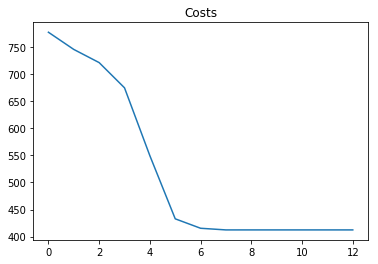

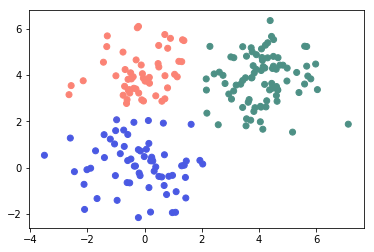

Final cost 412.4323263021451


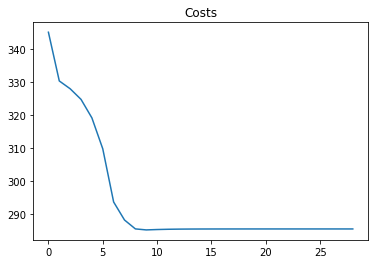

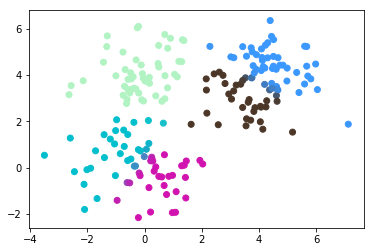

Final cost 285.52690670091556


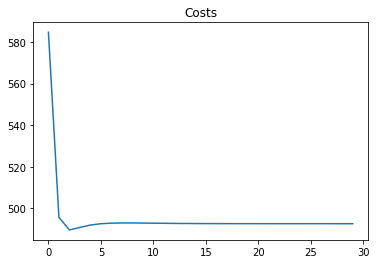

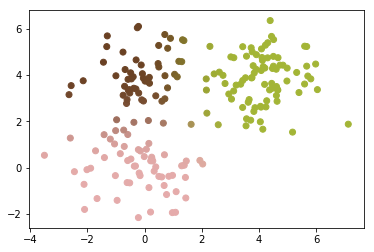

Final cost 492.58398387678545


In [40]:


def d(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R


def get_simple_data():
    data = pd.read_csv('Mall_Customers.csv')
    x = data.iloc[:,[2,3,4]].values
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = len(x) # number of samples
    X = np.zeros((N, D))
    X[:60, :] = np.random.randn(60, D) + mu1
    X[60:140, :] = np.random.randn(80, D) + mu2
    X[140:, :] = np.random.randn(60, D) + mu3
    return X


def main():
    X = get_simple_data()

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=1.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=3.0, show_plots=True)

    K = 3 # following the mu's above
    plot_k_means(X, K, beta=10.0, show_plots=True)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)


if __name__ == '__main__':
    main()


# Alternate solution for No.3

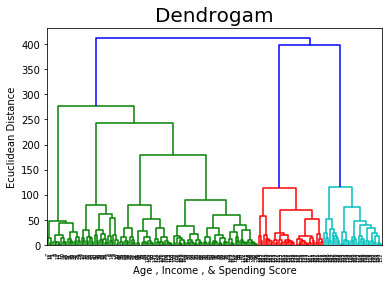

In [46]:
data = pd.read_csv('Mall_Customers.csv')
    # After importing, I did "data.info, data.decsribe, data.isnull().any()" to get basic information about the csv file before proceeding  
x = data.iloc[:,[2,3,4]].values
    


    
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Age , Income , & Spending Score')
plt.ylabel('Ecuclidean Distance')
plt.show()